In [1]:
#随机模块
import random

#时间测试模块
import time

#数学运算模块
import math

#科学绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#numpy
import numpy as np

#pandas
#import pandas as pd

#pytorch
import torch
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import Dataset,TensorDataset,DataLoader

#TorchLearning
from torchLearning import *

#Ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def Z_ScoreNormalization(data):
    # (0)--> 对 col 操作！
    stdDf = data.std(0)
    meanDf = data.mean(0)
    normSet = (data - meanDf)/stdDf
    return normSet


In [3]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg =2)
features_norm = Z_ScoreNormalization(features)

train_loader ,test_loader = split_loader(features, labels)
train_loader_norm, test_loader = split_loader(features_norm,labels)

In [4]:
torch.manual_seed(24)
lr = 0.01
num_epochs = 20
sigmoid_model3 = Sigmoid_class3()
sigmoid_model3_norm = Sigmoid_class3()

for m in sigmoid_model3.modules():
    if isinstance(m,nn.Linear):
        nn.init.xavier_uniform_(m.weight)

for m in sigmoid_model3_norm.modules():
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)

train_l, test_l =  model_train_test(sigmoid_model3,
                                 train_loader,
                                 test_loader,
                                 num_epochs= num_epochs,
                                 criterion= nn.MSELoss(),
                                 optimizer= optim.SGD,
                                 lr = lr,
                                 cla = False,
                                 eva = mse_cal)

train_l_norm, test_l_norm =  model_train_test(sigmoid_model3_norm,
                                 train_loader_norm,
                                 test_loader,
                                 num_epochs= num_epochs,
                                 criterion= nn.MSELoss(),
                                 optimizer= optim.SGD,
                                 lr = lr,
                                 cla = False,
                                 eva = mse_cal)

Parameter containing:
tensor([[ 0.8590, -0.6975],
        [ 0.1762, -0.7295],
        [ 0.5904,  0.3405],
        [-0.7281, -0.0867]], requires_grad=True)

Parameter containing:
tensor([[-0.5633,  0.1303, -0.5045,  0.3393],
        [-0.7823,  0.2525,  0.7264,  0.5470],
        [ 0.7246, -0.0357, -0.6253,  0.1108],
        [-0.3299, -0.5521,  0.5269,  0.1061]], requires_grad=True)

Parameter containing:
tensor([[ 0.4386,  0.8341,  0.1352, -0.8077],
        [ 0.2441,  0.4123,  0.0232, -0.7393],
        [ 0.8236, -0.8110,  0.6018, -0.0395],
        [ 0.6284, -0.7337,  0.8656,  0.2915]], requires_grad=True)

Parameter containing:
tensor([[0.9703, 0.6656, 0.8244, 0.3487]], requires_grad=True)

Parameter containing:
tensor([[-0.2945,  0.9237],
        [ 0.7596, -0.6387],
        [-0.0023, -0.3001],
        [-0.9573,  0.0271]], requires_grad=True)

Parameter containing:
tensor([[-0.5126, -0.1948, -0.2230,  0.7317],
        [ 0.3355, -0.7767,  0.4933,  0.5650],
        [ 0.3391,  0.3513,  0.3385,  0.0232],
        [-0.7911, -0.4265,  0.5541,  0.2841]], requires_grad=True)

Parameter containing:
tensor([[ 0.6846,  0.2079,  0.8334, -0.3973],
        [-0.4116,  0.3072, -0.4335,  0.3472],
        [ 0.0940, -0.3414,  0.2058,  0.8155],
        [ 0.4660, -0.8182,  0.3571,  0.5147]], requires_grad=True)

Parameter containing:
tensor([[ 0.7612, -0.2644,  0.8887,  0.8696]], requires_grad=True)

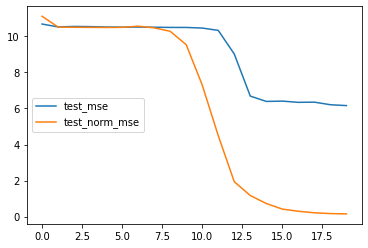

In [5]:
plt.plot(list(range(num_epochs)),test_l,label = "test_mse")
plt.plot(list(range(num_epochs)),test_l_norm,label = "test_norm_mse")
plt.legend(loc = 6 )

In [6]:
features

tensor([[-0.0070,  0.5044],
        [ 0.6704, -0.3829],
        [ 0.0302,  0.3826],
        ...,
        [-0.9164, -0.6087],
        [ 0.7815,  1.2865],
        [ 1.4819,  1.1390]])

In [7]:
f = Z_ScoreNormalization(features)
f

tensor([[-0.0463,  0.4504],
        [ 0.6166, -0.4218],
        [-0.0098,  0.3307],
        ...,
        [-0.9362, -0.6437],
        [ 0.7253,  1.2191],
        [ 1.4107,  1.0741]])

<Axes: >

Text(0.5, 1.0, 'features distribition')

<Axes: >

Text(0.5, 1.0, 'f distribition')

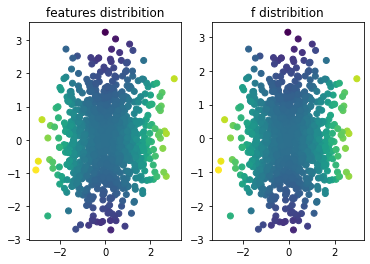

In [8]:
plt.subplot(121)
plt.scatter(features[:,0], features[:,1], c= labels)
plt.title("features distribition")

plt.subplot(122)
plt.scatter(f[:,0], f[:,1], c= labels)
plt.title("f distribition")

<Axes: >

Text(0.5, 1.0, 'features distribition')

<Axes: >

Text(0.5, 1.0, 'f distribition')

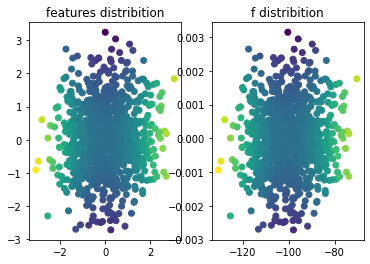

In [9]:
plt.subplot(121)
plt.scatter(features[:,0], features[:,1], c= labels)
plt.title("features distribition")

plt.subplot(122)
plt.scatter(f[:,0]*10-100, f[:,1]*0.001, c= labels)
plt.title("f distribition")

In [10]:
nn.BatchNorm1d?

Init signature:
nn.BatchNorm1d(
    num_features: int,
    eps: float = 1e-05,
    momentum: float = 0.1,
    affine: bool = True,
    track_running_stats: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies Batch Normalization over a 2D or 3D input as described in the paper
`Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .

.. math::

    y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta

The mean and standard-deviation are calculated per-dimension over
the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
of size `C` (where `C` is the number of features or channels of the input). By default, the
elements of :math:`\gamma` are set to 1 and the elements of :math:`\beta` are set to 0. The
standard-deviation is calculated via the biased estimator, equivalent to `torch.var(input, unbiased=False)`.

Also by default, d

In [11]:
a =  torch.arange(9).reshape(3,3).float()
a

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [12]:
bn1 = nn.BatchNorm1d(3)

In [13]:
bn1(a)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

In [14]:
torch.mean(a,0)

tensor([3., 4., 5.])

In [15]:
#z-sccore 结果
(a - torch.mean(a,0)) / torch.sqrt(torch.var(a,0))


tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])

In [16]:
(a - torch.mean(a,0)) / torch.sqrt(torch.var(a,0,unbiased=False))

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]])

In [17]:
bn1.parameters()

<generator object Module.parameters at 0x0000020994539430>

In [18]:
list(bn1.parameters())

[Parameter containing:
 tensor([1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True)]

复杂回归模型的测试

In [19]:
# 设置随机数种子
torch.manual_seed(420)  

# 创建最高项为2的多项式回归数据集
features, labels = tensorGenReg(w=[2, -1, 3, 1, 2], bias=False, deg=2)

# 进行数据集切分与加载
train_loader, test_loader = split_loader(features, labels, batch_size=50)

In [20]:
# class1对比模型
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model1 = net_class1(act_fun= torch.sigmoid, in_features=5)
sigmoid_model1_norm = net_class1(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls1 = [sigmoid_model1, sigmoid_model1_norm]           
name_ls1 = ['sigmoid_model1', 'sigmoid_model1_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls1, test_ls1 = model_comparison(model_l = model_ls1, 
                                       name_l = name_ls1, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)


# class2对比模型
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model2 = net_class2(act_fun= torch.sigmoid, in_features=5)
sigmoid_model2_norm = net_class2(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls2 = [sigmoid_model2, sigmoid_model2_norm]           
name_ls2 = ['sigmoid_model2', 'sigmoid_model2_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls2, test_ls2 = model_comparison(model_l = model_ls2, 
                                       name_l = name_ls2, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# class3对比模型
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model3 = net_class3(act_fun= torch.sigmoid, in_features=5)
sigmoid_model3_norm = net_class3(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls3 = [sigmoid_model3, sigmoid_model3_norm]           
name_ls3 = ['sigmoid_model3', 'sigmoid_model3_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls3, test_ls3 = model_comparison(model_l = model_ls3, 
                                       name_l = name_ls3, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# class4对比模型
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model4 = net_class4(act_fun= torch.sigmoid, in_features=5)
sigmoid_model4_norm = net_class4(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls4 = [sigmoid_model4, sigmoid_model4_norm]           
name_ls4 = ['sigmoid_model4', 'sigmoid_model4_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls4, test_ls4 = model_comparison(model_l = model_ls4, 
                                       name_l = name_ls4, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

In [25]:
train_ls1

tensor([[80.5502, 34.1971, 33.5645, 33.2907, 32.6397, 31.3443, 29.8018, 28.1430,
         25.4010, 22.1455, 19.8575, 18.4219, 17.4862, 16.5241, 14.1358, 13.1555,
         12.9441, 12.2160, 11.7999, 11.5635, 12.0217, 11.3075, 11.0661, 11.2863,
         11.1823, 11.1630, 11.1956, 10.9286, 10.7991, 10.8258, 10.4288, 11.2994,
         11.2720, 10.9139, 10.8790, 11.2046, 10.8178, 11.9764, 11.0157, 10.5759],
        [95.3238, 34.9301, 33.7650, 33.4742, 32.9228, 31.7470, 30.0618, 27.4829,
         24.1253, 21.3179, 17.6308, 15.4312, 14.3014, 13.7056, 13.1577, 12.9580,
         12.3581, 12.2607, 12.1037, 12.0079, 11.5249, 12.0209, 12.0499, 11.3071,
         11.2258, 11.1303, 11.3779, 11.0031, 11.0466, 11.9385, 10.9747, 10.8869,
         10.5348, 10.6475, 10.7875, 10.4138, 10.6968, 10.5816, 10.9196, 10.8231]])

(<Figure size 720x720 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

<Axes: >

Text(0.5, 1.0, 'mse_train_ls1')

<Axes: >

Text(0.5, 1.0, 'mse_train_ls2')

<Axes: >

Text(0.5, 1.0, 'mse_train_ls3')

<Axes: >

Text(0.5, 1.0, 'mse_train_ls4')

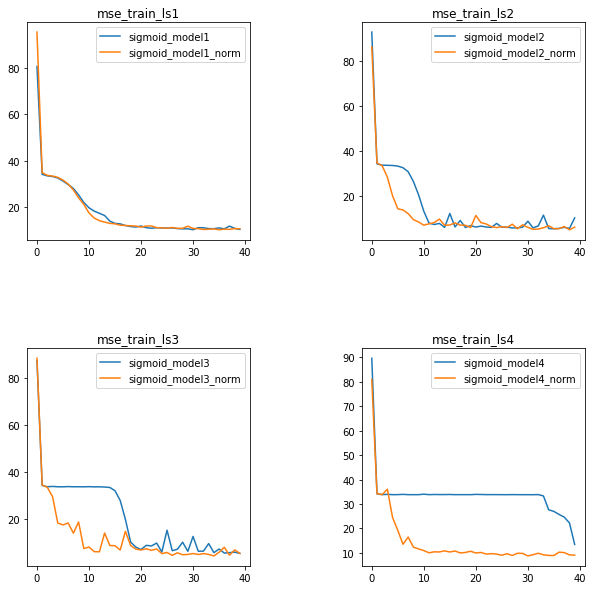

In [24]:
# 训练误差
plt.subplots(nrows = 2, ncols = 2, figsize = ( 10, 10))
plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
plt.subplot(221)
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), train_ls1[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls1')

plt.subplot(222)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), train_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls2')

plt.subplot(223)
for i, name in enumerate(name_ls3):
    plt.plot(list(range(num_epochs)), train_ls3[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls3')

plt.subplot(224)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), train_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls4')

Text(0.5, 1.0, 'mse_test')

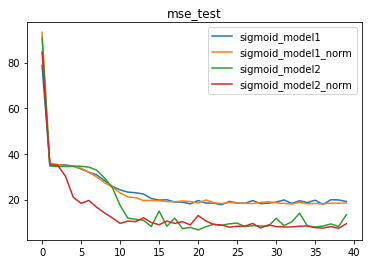

In [26]:
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), test_ls1[i], label=name)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), test_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

In [27]:
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_lh, test_lh = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

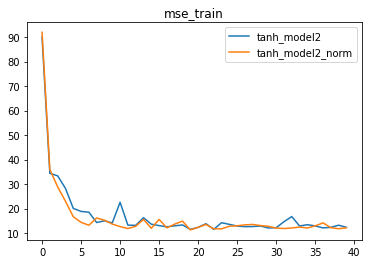

In [28]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_lh[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

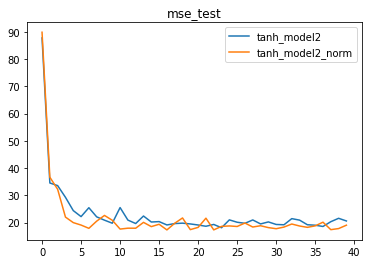

In [29]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_lh[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

learning rate的优化

In [30]:
# 0.1学习率
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.1

# 模型训练
train_l1, test_l1 = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)


# 0.03学习率
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.03

# 模型训练
train_l03, test_l03 = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)


# 0.01学习率
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.01

# 模型训练
train_l01, test_l01 = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# 0.005学习率
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.005

# 模型训练
train_l005, test_l005 = model_comparison(model_l = model_l, 
                                         name_l = name_l, 
                                         train_data = train_loader,
                                         test_data = test_loader,
                                         num_epochs = num_epochs, 
                                         criterion = nn.MSELoss(), 
                                         optimizer = optim.SGD, 
                                         lr = lr, 
                                         cla = False, 
                                         eva = mse_cal)

(<Figure size 720x720 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

<Axes: >

<Axes: >

<Axes: >

<Axes: >

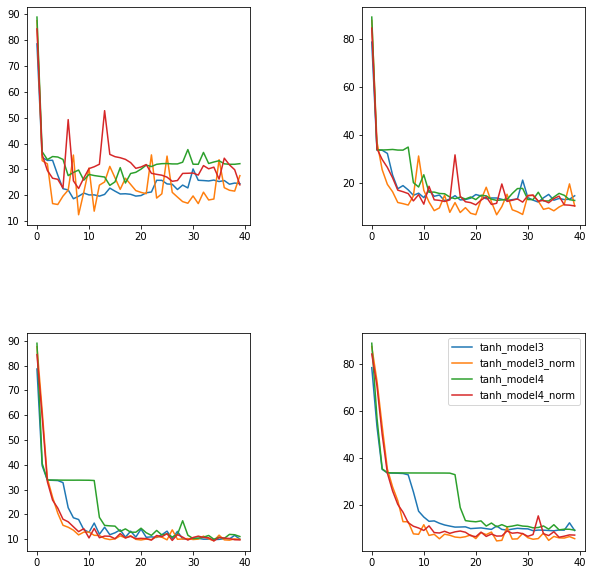

In [33]:
# 训练误差

plt.subplots(nrows = 2, ncols = 2, figsize = ( 10, 10))
plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
plt.subplot(221)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l1[i])

plt.subplot(222)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l03[i])

plt.subplot(223)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l01[i])

plt.subplot(224)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l005[i], label=name)
plt.legend(loc = 1)

In [34]:
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.01
num_epochs = 40

# 模型训练
train_ls, test_ls = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

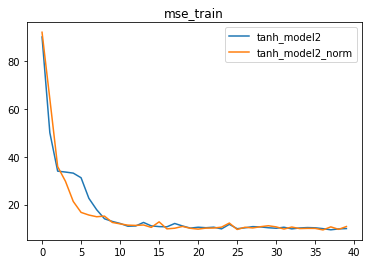

In [35]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_ls[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

In [36]:
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.001
num_epochs = 40

# 模型训练
train_lss, test_lss = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# 学习率为0.01时模型误差
train_lss[1:,-5:].mean()
test_lss[1:,-5:].mean()

tensor(9.3185)

tensor(16.9204)

In [37]:
 #设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.005
num_epochs = 40

# 模型训练
train_lms, test_lms = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# 学习率为0.05时模型误差
train_lms[1:,-5:].mean()
test_lms[1:,-5:].mean()

tensor(9.5439)

tensor(17.3678)

In [38]:
lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_lh[1:,-5:].mean(), train_ls[1:,-5:].mean(), train_lms[1:,-5:].mean(), train_lss[1:,-5:].mean()]
test_ln = [test_lh[1:,-5:].mean(), test_ls[1:,-5:].mean(), test_lms[1:,-5:].mean(), test_lss[1:,-5:].mean()]

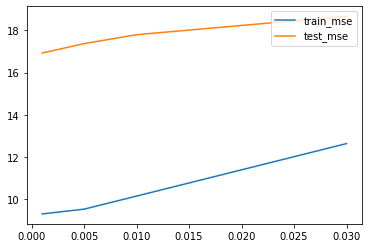

In [39]:
plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
#plt.ylim(0, 15)

In [40]:
lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_lh[1:,-5:].mean(), train_ls[1:,-5:].mean(), train_lms[1:,-5:].mean(), train_lss[1:,-5:].mean()]
test_ln = [test_lh[1:,-5:].mean(), test_ls[1:,-5:].mean(), test_lms[1:,-5:].mean(), test_lss[1:,-5:].mean()]
train_l = [train_lh[0:,-5:].mean(), train_ls[0:,-5:].mean(), train_lms[0:,-5:].mean(), train_lss[0:,-5:].mean()]
test_l = [test_lh[0:,-5:].mean(), test_ls[0:,-5:].mean(), test_lms[0:,-5:].mean(), test_lss[0:,-5:].mean()]

<Axes: >

(4.0, 25.0)

Text(0.5, 1.0, 'With BN(tanh2)')

<Axes: >

(4.0, 25.0)

Text(0.5, 1.0, 'Without BN(tanh2)')

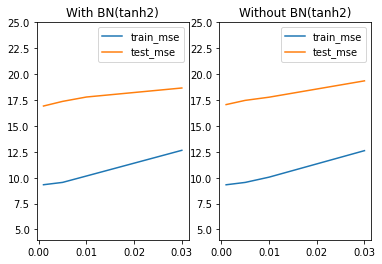

In [41]:
plt.subplot(121)
plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('With BN(tanh2)')
plt.subplot(122)
plt.plot(lr_l, train_l, label='train_mse')
plt.plot(lr_l, test_l, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('Without BN(tanh2)')

In [42]:
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model3 = net_class3(act_fun= torch.tanh, in_features=5)
tanh_model3_norm = net_class3(act_fun= torch.tanh, in_features=5, BN_model='pre')
tanh_model4 = net_class4(act_fun= torch.tanh, in_features=5)
tanh_model4_norm = net_class4(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
lr = 0.001
num_epochs = 40

# 模型训练
train_l001, test_l001 = model_comparison(model_l = model_l, 
                                         name_l = name_l, 
                                         train_data = train_loader,
                                         test_data = test_loader,
                                         num_epochs = num_epochs, 
                                         criterion = nn.MSELoss(), 
                                         optimizer = optim.SGD, 
                                         lr = lr, 
                                         cla = False, 
                                         eva = mse_cal)

In [43]:
lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_l03[1:,-5:].mean(), train_l01[1:,-5:].mean(), train_l005[1:,-5:].mean(), train_l001[1:,-5:].mean()]
test_ln = [test_l03[1:,-5:].mean(), test_l01[1:,-5:].mean(), test_l005[1:,-5:].mean(), test_l001[1:,-5:].mean()]
train_l = [train_l03[0:,-5:].mean(), train_l01[0:,-5:].mean(), train_l005[0:,-5:].mean(), train_l001[0:,-5:].mean()]
test_l = [test_l03[0:,-5:].mean(), test_l01[0:,-5:].mean(), test_l005[0:,-5:].mean(), test_l1[0:,-5:].mean()]

<Axes: >

(4.0, 25.0)

Text(0.5, 1.0, 'With BN(tanh3)')

<Axes: >

(4.0, 25.0)

Text(0.5, 1.0, 'Without BN(tanh3)')

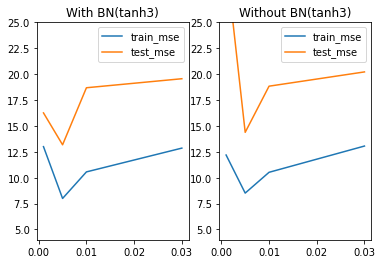

In [44]:
plt.subplot(121)
plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('With BN(tanh3)')
plt.subplot(122)
plt.plot(lr_l, train_l, label='train_mse')
plt.plot(lr_l, test_l, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('Without BN(tanh3)')

In [45]:
lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_l03[3:,-5:].mean(), train_l01[3:,-5:].mean(), train_l005[3:,-5:].mean(), train_l001[3:,-5:].mean()]
test_ln = [test_l03[3:,-5:].mean(), test_l01[3:,-5:].mean(), test_l005[3:,-5:].mean(), test_l001[3:,-5:].mean()]
train_l = [train_l03[2:,-5:].mean(), train_l01[2:,-5:].mean(), train_l005[2:,-5:].mean(), train_l001[2:,-5:].mean()]
test_l = [test_l03[2:,-5:].mean(), test_l01[2:,-5:].mean(), test_l005[2:,-5:].mean(), test_l1[2:,-5:].mean()]

<Axes: >

(4.0, 25.0)

Text(0.5, 1.0, 'With BN(tanh4)')

<Axes: >

(4.0, 25.0)

Text(0.5, 1.0, 'Without BN(tanh4)')

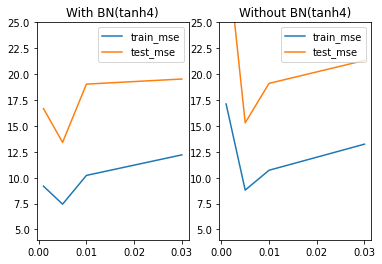

In [46]:
plt.subplot(121)
plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('With BN(tanh4)')
plt.subplot(122)
plt.plot(lr_l, train_l, label='train_mse')
plt.plot(lr_l, test_l, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('Without BN(tanh4)')

## 四、带BN层的神经网络模型综合调整策略总结